In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Read Input Data

In [2]:
df = pd.read_excel('result.xlsx')

In [3]:
df.sort_values('Time',inplace=True)

In [4]:
df.head()

,Avg Area,Avg Depth,Avg Width,Time,n_items
65,4.794,2.390,1.943,0.024,3
2,5.373,2.763,1.943,0.024,3
33,3.967,1.797,2.193,0.024,3
47,6.071,3.237,1.840,0.024,3
61,3.578,2.150,1.700,0.026,3


In [5]:
df2 = df[df['Time'] < 300]
#df2 = df.drop(columns=['Obj heur', 'Obj mod', 'Min Time', 'Max Time', 'Min Area', 'Max Area', 'Min D', 'Max D', 'Min W', 'Max W'])

In [30]:
df2

,Avg Area,Avg Depth,Avg Width,Time,n_items
0,4.794,2.390,1.943,0.024,3
1,5.373,2.763,1.943,0.024,3
2,3.967,1.797,2.193,0.024,3
3,6.071,3.237,1.840,0.024,3
4,3.578,2.150,1.700,0.026,3
5,4.096,2.057,2.010,0.029,3
6,3.890,1.957,2.027,0.033,3
7,3.781,2.083,1.713,0.034,3
8,4.522,2.163,2.153,0.036,3
9,5.019,2.313,2.123,0.038,3


## Correlation

In [7]:
df2.corr()

,Avg Area,Avg Depth,Avg Width,Time,n_items
Avg Area,1.000000,0.964034,0.074877,-0.046496,0.100534
Avg Depth,0.964034,1.000000,-0.167571,0.000383,0.142676
Avg Width,0.074877,-0.167571,1.000000,-0.121717,-0.173974
Time,-0.046496,0.000383,-0.121717,1.000000,0.720056
n_items,0.100534,0.142676,-0.173974,0.720056,1.000000


Plot of correlation

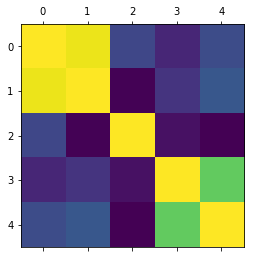

In [8]:
plt.matshow(df2.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5c1dd5110>,
      dtype=object)

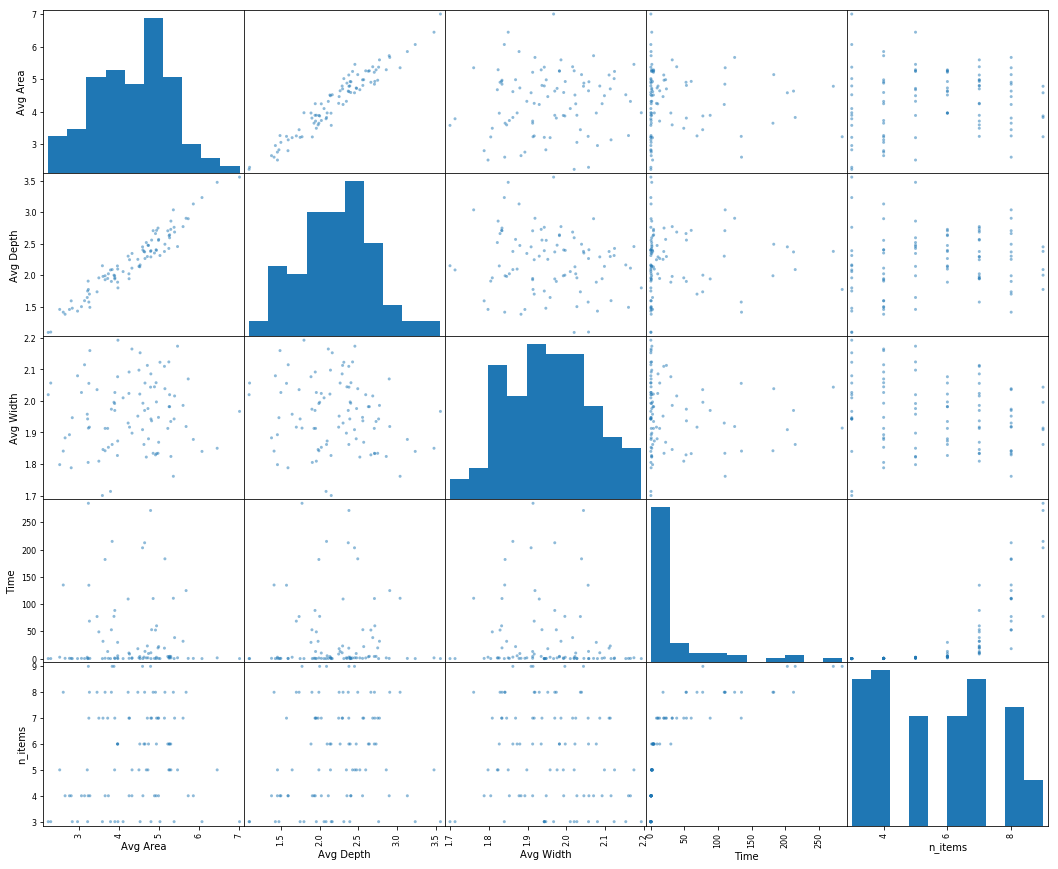

In [9]:
pd.plotting.scatter_matrix(df2, figsize=(18,15))

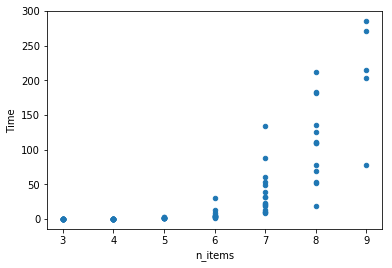

In [10]:
df2.plot.scatter('n_items', 'Time')

## Analyze data information

In [11]:
df2.reset_index(inplace=True,drop=True)

In [12]:
df3 = df2.drop(columns=['Time'])

## Rescale data

In [13]:
scaler = StandardScaler()

In [14]:
df3 = pd.DataFrame(data = scaler.fit_transform(df3))

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python2.7/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Rescaled data

In [15]:
df3.head()

,0,1,2,3
0,0.490302,0.350987,-0.136758,-1.378774
1,1.090092,1.104436,-0.136758,-1.378774
2,-0.366392,-0.846856,2.149235,-1.378774
3,1.813155,2.061902,-1.078587,-1.378774
4,-0.769360,-0.133806,-2.358743,-1.378774


## PCA

In [16]:
pca = PCA()

In [17]:
principalDf = pd.DataFrame(data = pca.fit_transform(df3), columns = ['pc1','pc2','pc3','pc4'])

In [18]:
cumul_expl_var_ratio = pca.explained_variance_ratio_.cumsum()

In [19]:
cumul_expl_var_ratio

array([0.50078136, 0.79062485, 0.9984193 , 1.        ])

In [20]:
pca.explained_variance_ratio_

array([0.50078136, 0.28984349, 0.20779445, 0.0015807 ])

Data in the new system

In [21]:
principalDf.head()

,pc1,pc2,pc3,pc4
0,0.338941,0.890303,1.167199,-0.115906
1,1.275808,1.062215,1.253714,-0.003324
2,-1.308113,2.339210,-0.433399,0.027220
3,2.531819,0.571301,1.966418,0.006500
4,-0.643436,-1.073200,2.550930,0.038582


New orthogonal system vectors

In [22]:
pca.components_

array([[ 6.83390472e-01,  6.99418774e-01, -9.79023106e-02,
         1.84948582e-01],
       [ 2.29475754e-01,  4.54906096e-02,  7.43653942e-01,
        -6.26298888e-01],
       [-2.22048139e-02,  1.32502649e-01, -6.39067145e-01,
        -7.57326336e-01],
       [-6.92694223e-01,  7.00847366e-01,  1.70256090e-01,
        -7.39172353e-04]])

In [23]:
df_compressed = principalDf.drop(columns=['pc4'])
df_compressed = pd.concat([df_compressed, df2['Time']],axis=1)

In [24]:
df_compressed.head()

,pc1,pc2,pc3,Time
0,0.338941,0.890303,1.167199,0.024
1,1.275808,1.062215,1.253714,0.024
2,-1.308113,2.339210,-0.433399,0.024
3,2.531819,0.571301,1.966418,0.024
4,-0.643436,-1.073200,2.550930,0.026


In [25]:
df_compressed.corr()

,pc1,pc2,pc3,Time
pc1,1.000000e+00,1.777280e-16,9.076931e-17,0.080252
pc2,1.777280e-16,1.000000e+00,-7.954082e-17,-0.512785
pc3,9.076931e-17,-7.954082e-17,1.000000e+00,-0.511631
Time,8.025211e-02,-5.127852e-01,-5.116312e-01,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5bef86b50>,
      dtype=object)

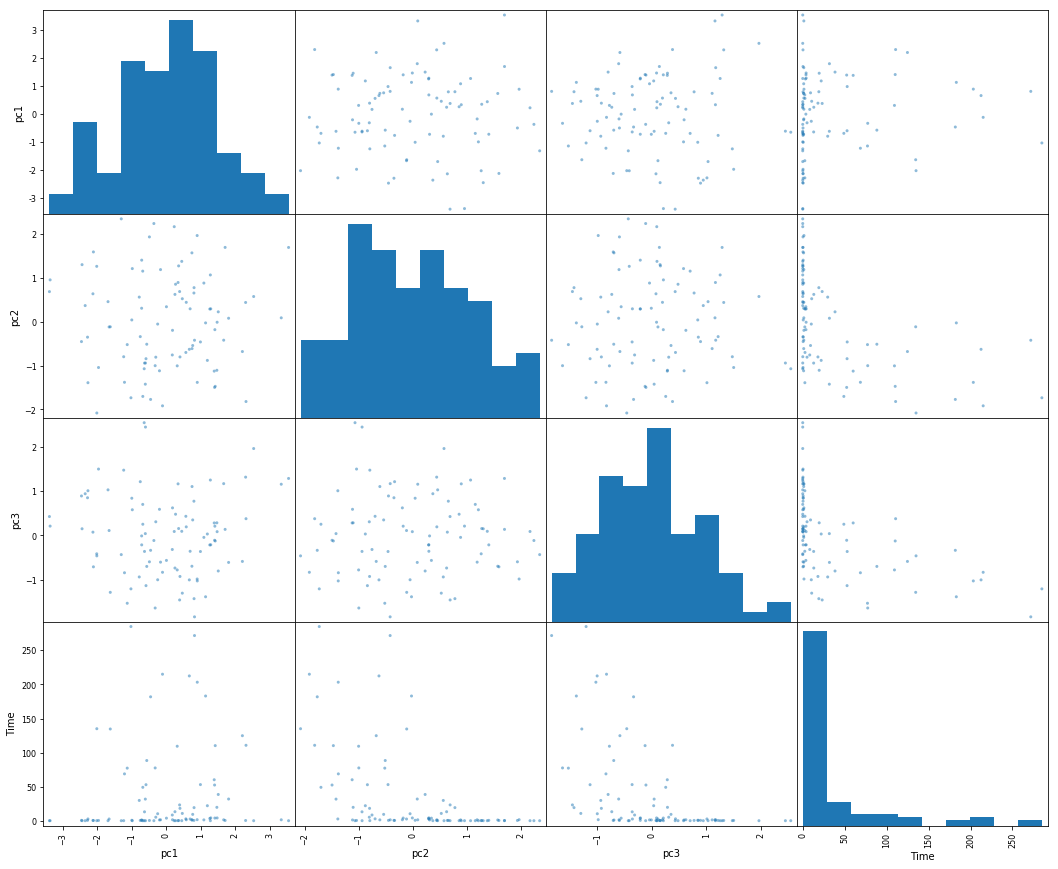

In [26]:
pd.plotting.scatter_matrix(df_compressed, figsize=(18,15))

## Linear Regression

In [27]:
regressor = LinearRegression()

In [28]:
X = df_compressed.copy()
y = X.pop('Time')

In [29]:
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)